In [1]:
import pandas as pd # Untuk membaca dan menulis data dari berbagai format file
import numpy as np #Untuk operasi numerik dan penanganan array.
import matplotlib.pyplot as plt #Untuk membuat plot dan visualisasi.
import seaborn as sns #Untuk visualisasi data statistik, membuat grafik yang informatif dan menarik.
from sklearn.model_selection import train_test_split #Untuk membagi data menjadi bagian pelatihan dan pengujian model.
from sklearn.model_selection import GridSearchCV #Untuk mencari parameter terbaik untuk model machine learning secara otomatis, mengoptimalkan kinerja model.
from sklearn.preprocessing import PolynomialFeatures, StandardScaler #Untuk membuat fitur polinomial dan melakukan penskalaan data, meningkatkan akurasi model.
from sklearn.pipeline import Pipeline #Untuk menggabungkan beberapa langkah preprocessing dan pemodelan menjadi satu alur kerja, menyederhanakan proses.
from sklearn.tree import DecisionTreeRegressor #Untuk membuat model Decision Tree Regression, digunakan untuk memprediksi nilai numerik.
from sklearn.neighbors import KNeighborsRegressor #Untuk membuat model K-Nearest Neighbors Regression, digunakan untuk memprediksi nilai numerik berdasarkan tetangga terdekat.
from sklearn.linear_model import LinearRegression #Untuk membuat model Linear Regression, digunakan untuk memprediksi nilai numerik dengan hubungan linear.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #Untuk mengevaluasi kinerja model regression, mengukur akurasi prediksi.
from sklearn.impute import SimpleImputer  # For handling NaN values
from xgboost import XGBRegressor  # For XGBoost Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#Mount Google Drive

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Mount Google Drive

file_path = '/content/drive/MyDrive/RegresiUTSTelkomNew.csv'
#Read CSV file into DataFrame, handling errors and specifying encoding
df = pd.read_csv(file_path, on_bad_lines='skip', encoding='latin-1')
# Read CSV file into DataFrame

df.head()
#Menampilkan beberapa baris pertama DataFrame

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x2,x4,x7,x8,x41,x48,x64,x68,x70,x1
0,48.73215,70.32679,-24.83777,8.76630,202.18689,-125.94783,12.59163,-88.37882,46.49209,2001.0
1,50.95714,55.81851,-18.54940,-3.27872,13.09302,133.08169,1.75729,-12.14279,2.07554,2001.0
2,48.24750,36.29772,-26.21683,5.05097,-0.01744,778.02248,-11.63176,-83.15795,-22.11505,2001.0
3,50.97020,67.09964,-16.81409,-12.48207,28.68782,150.29661,-4.05003,-47.75605,-97.42948,2001.0
4,50.54767,92.35066,-19.04928,20.67345,51.41086,-31.97030,0.51657,-9.41185,33.54907,2001.0


In [4]:
eda_report = df.describe().transpose()
#Untuk melakukan analisis data eksploratif (EDA) dasar pada DataFrame df dan menyimpan hasilnya dalam variabel eda_report.

missing_values = df.isnull().sum()
#Untuk mencari nilai nilai data yang hilang

eda_report, missing_values
#Menampilkan statistik EDA dan nilai yang hilang

(       count         mean         std          min          25%         50%  \
 x2   79195.0    44.171165  224.903524      4.41850    39.960375    44.17598   
 x4   79195.0     8.786162   35.186329   -257.52560   -11.292270    10.44453   
 x7   79195.0    -9.391967   13.011836    -65.49817   -18.431110   -11.09789   
 x8   79195.0    -2.431315   14.457169   -165.32269   -10.715960    -1.96163   
 x41  79195.0    25.523905  205.494607  -2301.77780   -68.674755    22.30311   
 x48  79195.0    74.219228  472.706330 -13795.86627  -118.720470    73.78867   
 x64  79195.0     0.064699   37.566226   -471.67386   -18.030120    -2.97827   
 x68  79194.0     2.533239  101.088509  -1171.72837   -47.329282     1.62010   
 x70  79194.0    33.866466  105.250201  -1101.66657   -18.409255    23.57276   
 x1   79194.0  1998.208261   10.799785   1922.00000  1994.000000  2002.00000   
 
              75%          max  
 x2     47.810815  63312.00000  
 x4     29.787700    260.15070  
 x7     -2.200475  

# Visualisasi Distribusi Numerical Features


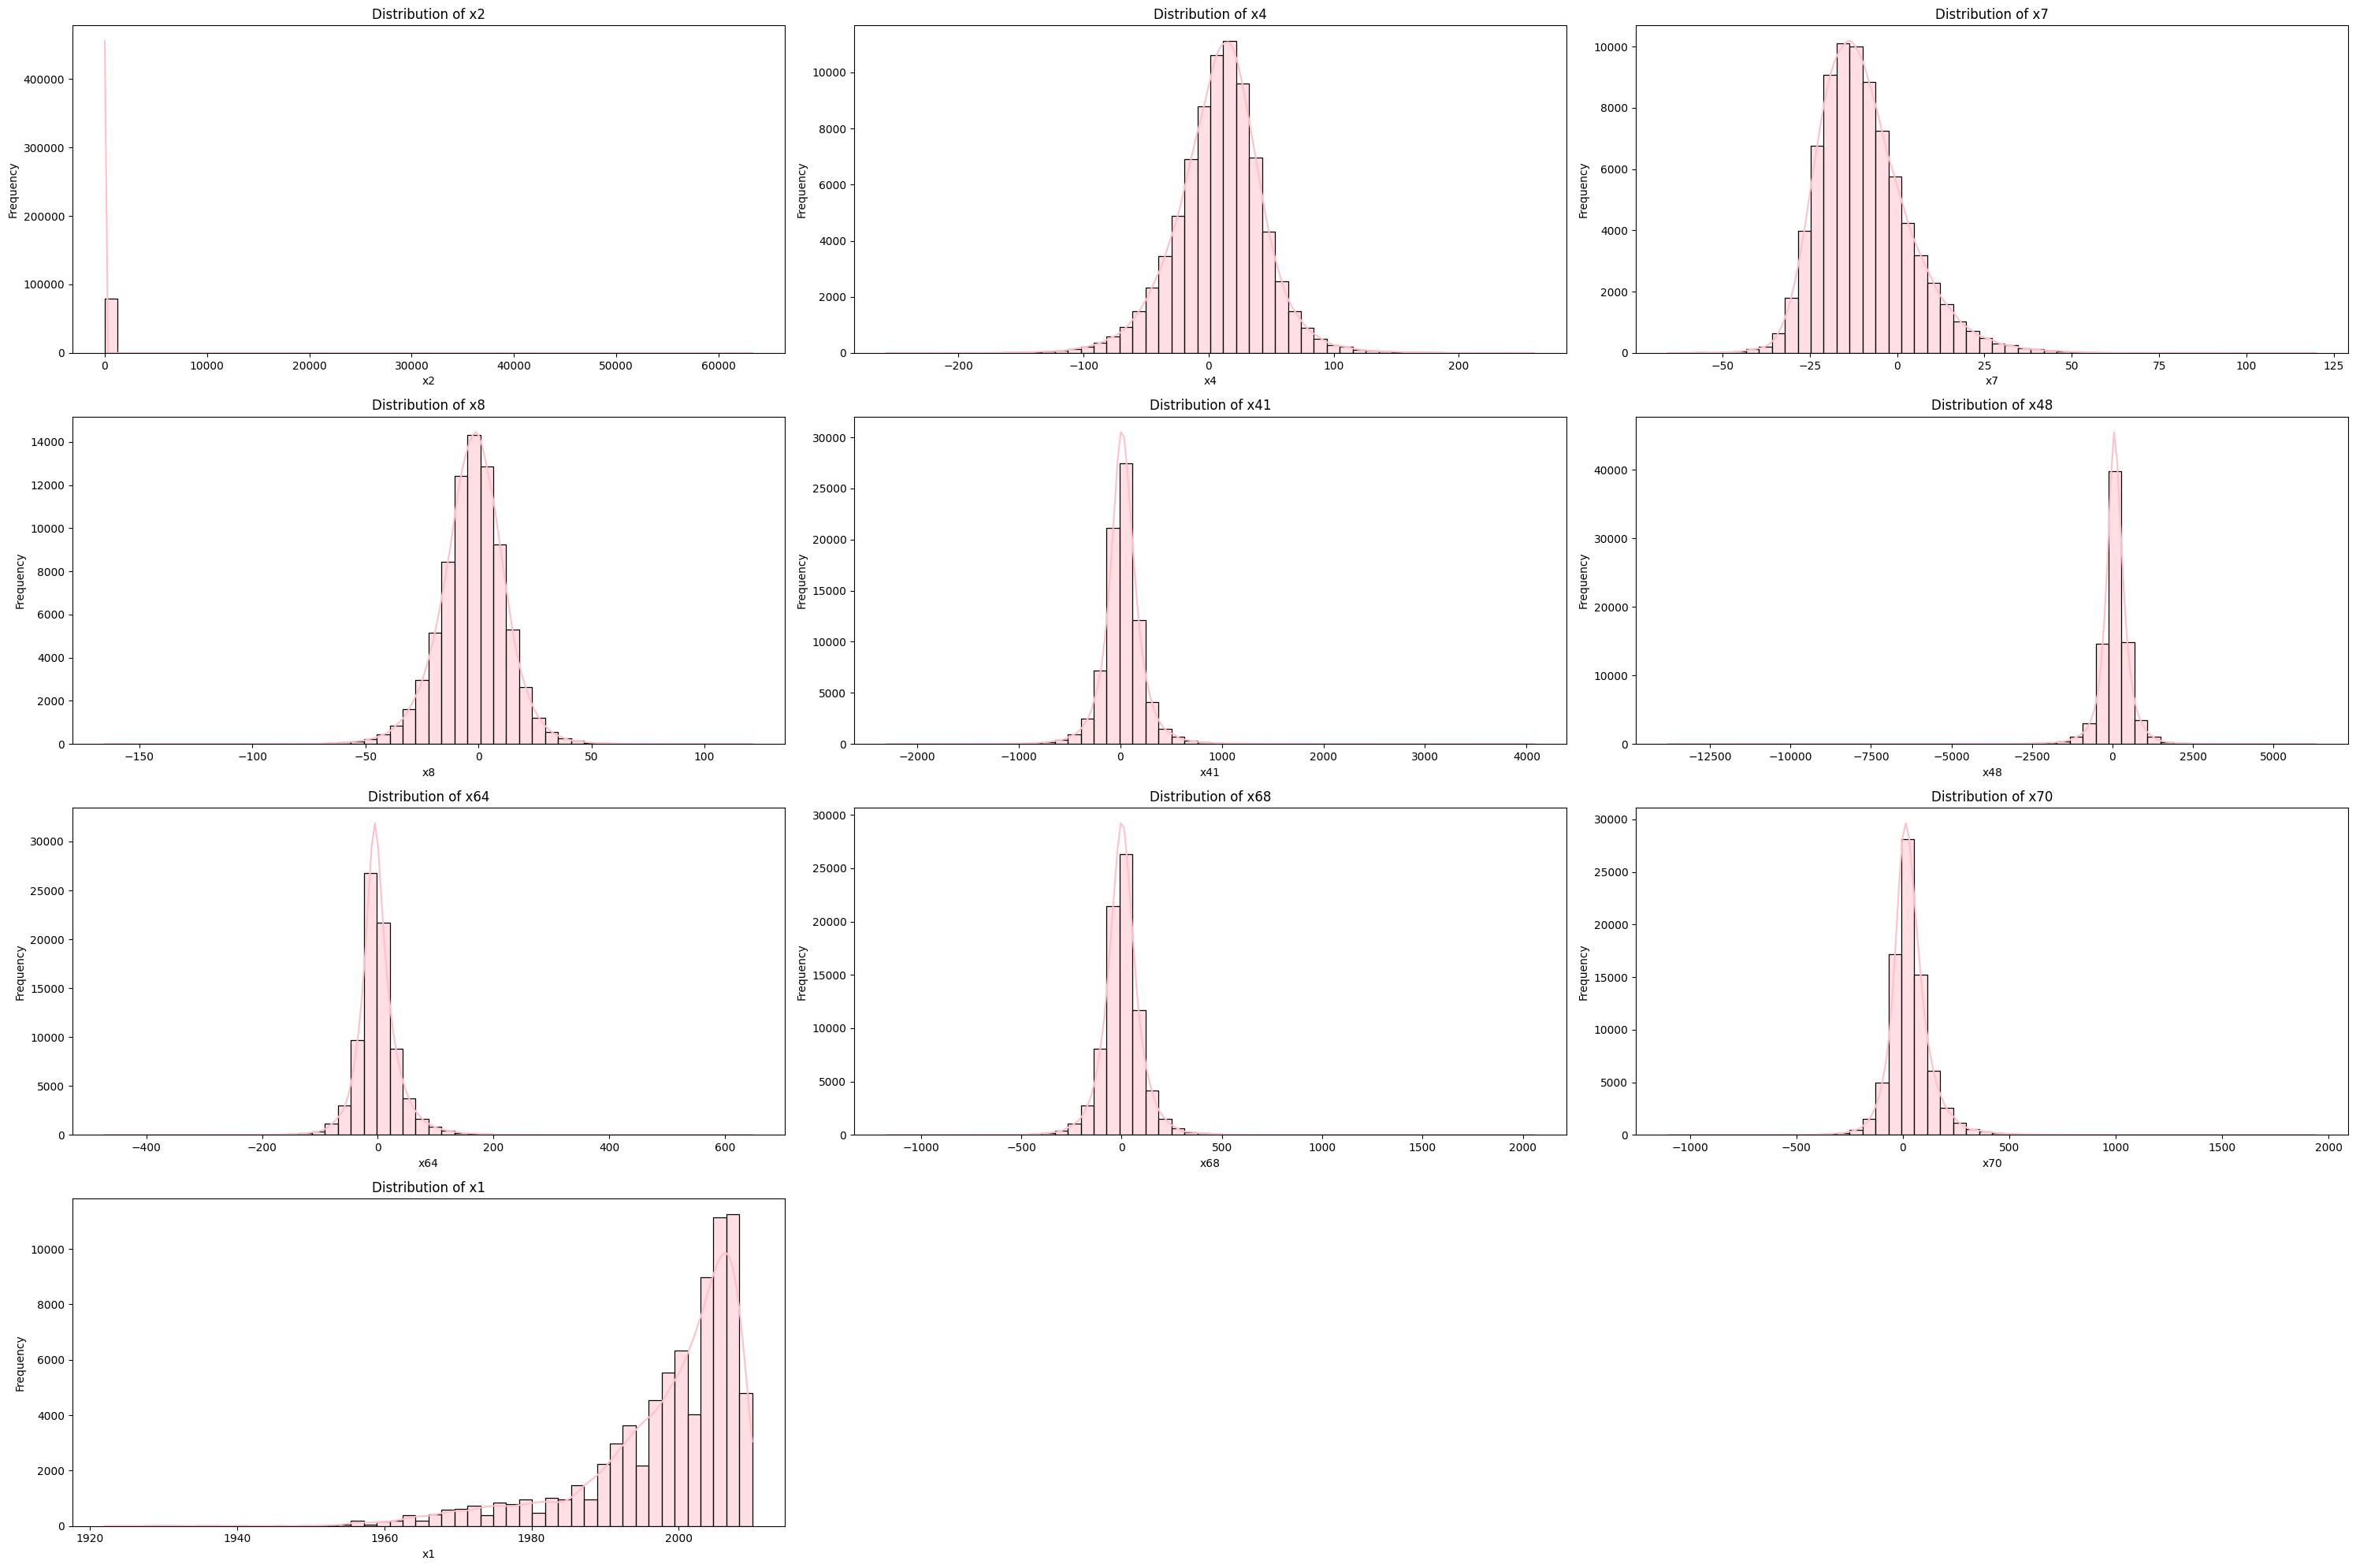

In [5]:
numerical_cols = df.columns

plt.figure(figsize=(30, 20))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, idx)
    sns.histplot(df[col], kde=True, bins=50, color='pink')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Sebagian besar fitur memiliki distribusi mendekati normal. Banyak dari fitur dalam dataset memiliki pola distribusi yang mirip dengan kurva normal, yaitu berbentuk lonceng simetris di sekitar rata-rata. Namun, ada outlier yang mencolok pada fitur tertentu Beberapa fitur, seperti x41, x37, dan x68, memiliki nilai-nilai ekstrem yang jauh dari data lainnya, disebut sebagai outliers. Outlier ini bisa memengaruhi analisis atau model statistik jika tidak ditangani dengan baik. Fitur seperti x2 dan x4 tampak lebih terpusat
Fitur-fitur ini memiliki data yang cenderung terkonsentrasi di sekitar nilai rata-rata, dengan variasi atau penyebaran yang lebih kecil. Fitur lain menunjukkan ekor panjang, yang mungkin mengindikasikan skewness
Ada fitur tertentu yang distribusinya memiliki ekor panjang (baik ke kanan atau ke kiri), yang menunjukkan distribusi data tidak simetris dan miring (skewed). Ekor panjang ini dapat terjadi karena adanya nilai-nilai ekstrem atau asimetri dalam data.

## Visualisasi Correlation Matrix

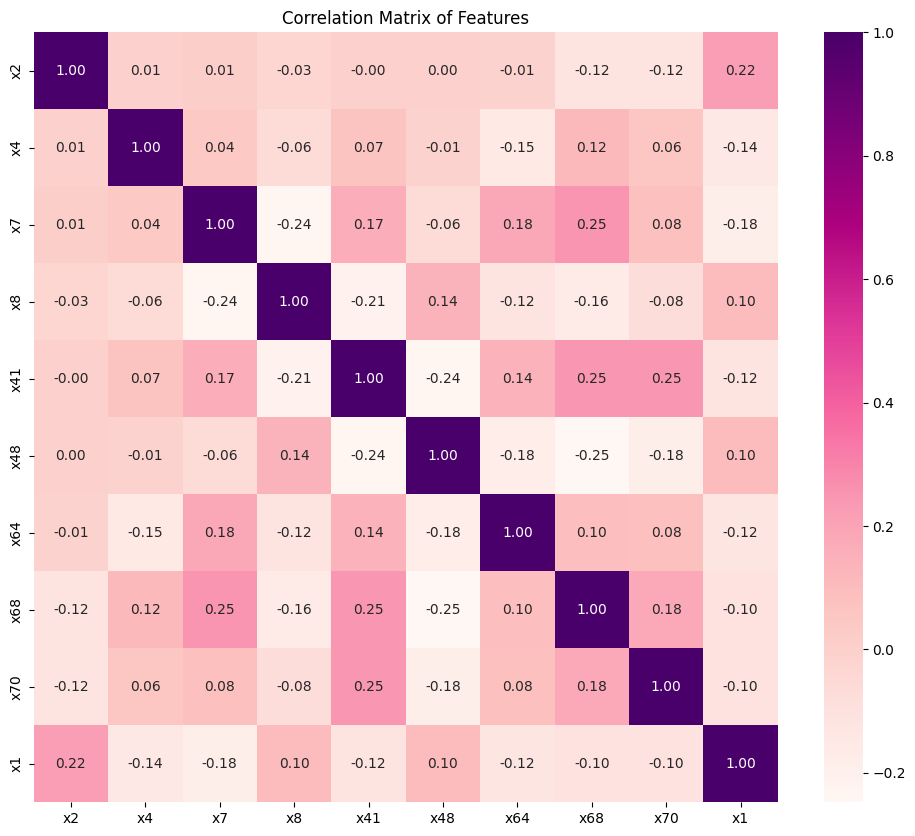

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

Beberapa fitur menunjukkan hubungan yang cukup signifikan. Misalnya, x41 dan x37 memiliki korelasi positif sedang, sedangkan x7 dan x2 memiliki korelasi negatif yang lemah. Pola ini dapat dimanfaatkan dalam proses seleksi fitur atau pengembangan fitur baru guna meningkatkan kinerja model regresi.








In [7]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
#Untuk menangani missing values (nilai yang hilang) dalam dataset.

X = df_imputed.drop(columns=['x1'])
y = df_imputed['x1']
#Membagi dataset menjadi fitur (X) dan target (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Membagi dataset menjadi data training dan data testing.

pipelines = {
    "Polynomial Regression": Pipeline([
        ('poly', PolynomialFeatures()),  #Membuat fitur polinomial dan interaksi untuk meningkatkan fleksibilitas model linear regression. Generates polynomial and interaction features
        ('scaler', StandardScaler()),  #Melakukan standardisasi fitur (mensentriskan data dengan mengurangi mean dan membaginya dengan standar deviasi) agar model lebih robust.
        ('model', LinearRegression())  #Model regresi linear.
    ]),
    "Decision Tree": Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))  #Model decision tree untuk regresi.
    ]),
    "k-NN": Pipeline([
        ('scaler', StandardScaler()),  #Melakukan standardisasi fitur.
        ('model', KNeighborsRegressor())  #Model k-Nearest Neighbors untuk regresi.
    ])
}
#Menggabungkan beberapa langkah preprocessing dan pemodelan menjadi satu alur kerja.

param_grids = {
    "Polynomial Regression": {'poly__degree': [1, 2, 3]},  #Mencoba nilai 1, 2, dan 3 untuk derajat polinomia
    "Decision Tree": {'model__max_depth': [5, 10, 20],  #Mencoba nilai 5, 10, dan 20 untuk kedalaman maksimum decision tree.
                      'model__min_samples_split': [2, 5, 10]},  #Mencoba nilai 2, 5, dan 10 untuk jumlah minimum sampel yang dibutuhkan untuk membagi node.
    "k-NN": {'model__n_neighbors': [3, 5, 10]}  #Mencoba nilai 3, 5, dan 10 untuk jumlah tetangga terdekat.
}
#Mendefinisikan grid parameter yang akan dicoba untuk setiap model machine learning selama proses hyperparameter tuning.

evaluation_results = []
for model_name, pipeline in pipelines.items():
    try:
        #elakukan grid search untuk menemukan kombinasi parameter terbaik dari param_grids untuk model tersebut.
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        #Mengambil model terbaik yang ditemukan oleh grid search.
        best_model = grid_search.best_estimator_

        #Melakukan prediksi pada data testing menggunakan model terbaik.
        y_pred = best_model.predict(X_test)

        #Menghitung metrik evaluasi seperti MSE, MAE, dan R².
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        #Menyimpan hasil evaluasi (nama model, parameter terbaik, dan metrik) dalam list evaluation_results.
        evaluation_results.append({
            "Model": model_name,
            "Best Parameters": grid_search.best_params_,
            "MSE": mse,
            "MAE": mae,
            "R²": r2
        })
    except ValueError as e:
        print(f"Error for {model_name}: {e}")
#Melakukan grid search untuk setiap model yang didefinisikan dalam pipelines dan menyimpan hasil evaluasi dalam sebuah list.

evaluation_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Results:")
print(evaluation_df)
#Mengubah hasil evaluasi model yang tersimpan dalam list evaluation_results menjadi DataFrame Pandas dan menampilkannya.

Model Evaluation Results:
                   Model                                    Best Parameters  \
0  Polynomial Regression                                {'poly__degree': 1}   
1          Decision Tree  {'model__max_depth': 5, 'model__min_samples_sp...   
2                   k-NN                         {'model__n_neighbors': 10}   

          MSE       MAE        R²  
0  106.817461  7.714993  0.073745  
1  100.701821  7.302964  0.126776  
2  106.774404  7.648052  0.074119  


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


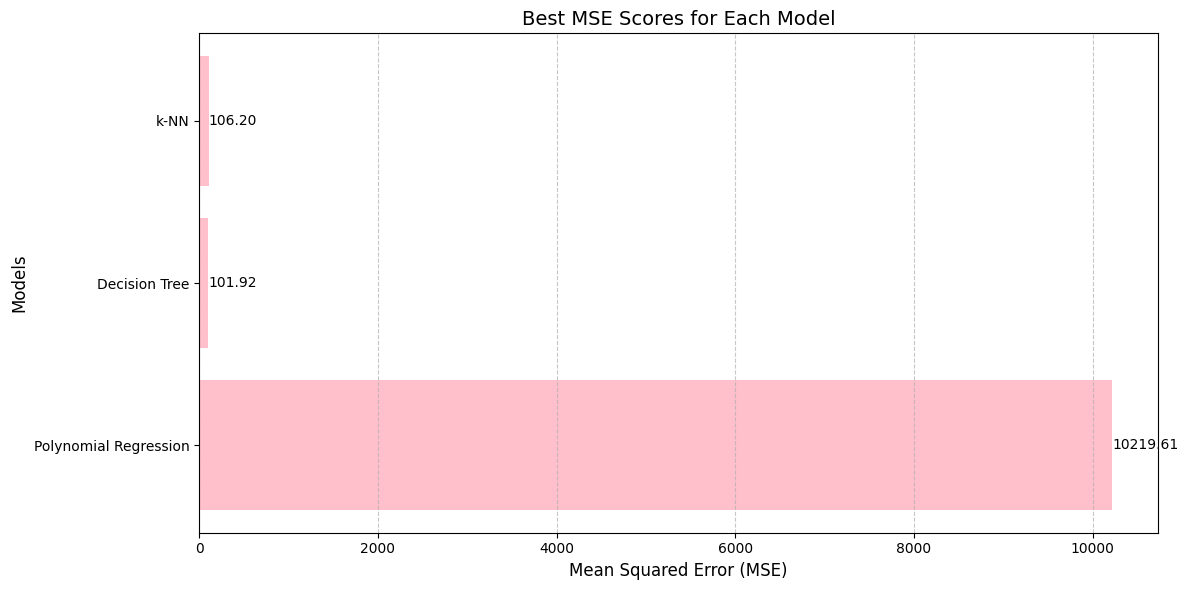

Best Parameters for Each Model:
Polynomial Regression: {'poly__degree': 1}
Decision Tree: {'model__max_depth': 5, 'model__min_samples_split': 2}
k-NN: {'model__n_neighbors': 10}


In [8]:
results = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }
#Melakukan grid search untuk setiap model yang didefinisikan dalam pipelines, mencari parameter terbaik, dan menyimpan parameter serta skor terbaik dalam dictionary results.

models = list(results.keys())
scores = [result['best_score'] for result in results.values()]
best_params = [str(result['best_params']) for result in results.values()]
#Mempersiapkan data dari dictionary results agar mudah digunakan untuk visualisasi.

plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='pink')
for i, v in enumerate(scores):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center', fontsize=10)

plt.title('Best MSE Scores for Each Model', fontsize=14)
plt.xlabel('Mean Squared Error (MSE)', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#Membuat visualisasi bar chart horizontal untuk menampilkan skor MSE terbaik dari setiap model machine learning yang telah dievaluasi.

print("Best Parameters for Each Model:")
for model, params in zip(models, best_params):
    print(f"{model}: {params}")
#Menampilkan parameter terbaik (hyperparameter) yang ditemukan oleh grid search untuk setiap model.

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


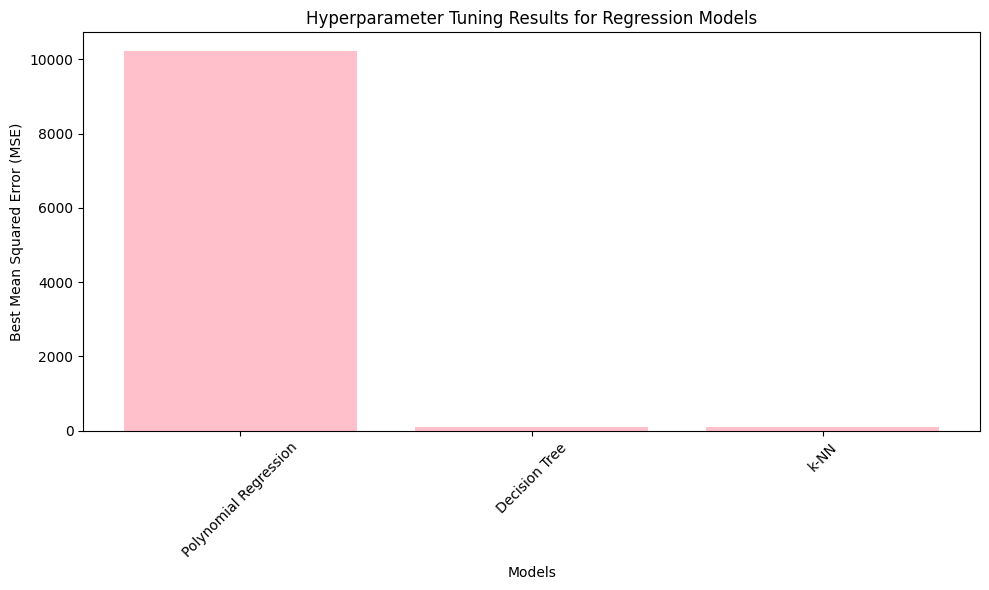

Hyperparameter Tuning Results:
                                                             best_params  \
Polynomial Regression                                {'poly__degree': 1}   
Decision Tree          {'model__max_depth': 5, 'model__min_samples_sp...   
k-NN                                          {'model__n_neighbors': 10}   

                         best_score  
Polynomial Regression  10219.605261  
Decision Tree            101.920302  
k-NN                     106.204197  


In [9]:
results = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }
#Melakukan grid search untuk setiap model yang didefinisikan dalam pipelines, mencari parameter terbaik (hyperparameter tuning), dan menyimpan parameter serta skor terbaik dalam dictionary results.

results_df = pd.DataFrame(results).transpose()
#Mengubah dictionary results (yang berisi hasil grid search untuk setiap model) menjadi DataFrame Pandas dan melakukan transpose pada DataFrame tersebut.


plt.figure(figsize=(10, 6))
models = results_df.index
mse_values = results_df['best_score']

plt.bar(models, mse_values, color='pink')
plt.xlabel("Models")
plt.ylabel("Best Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning Results for Regression Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Membuat visualisasi bar chart untuk menampilkan skor Mean Squared Error (MSE) terbaik dari setiap model machine learning setelah dilakukan hyperparameter tuning.

print("Hyperparameter Tuning Results:")
print(results_df)
#Menampilkan hasil secara detail

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


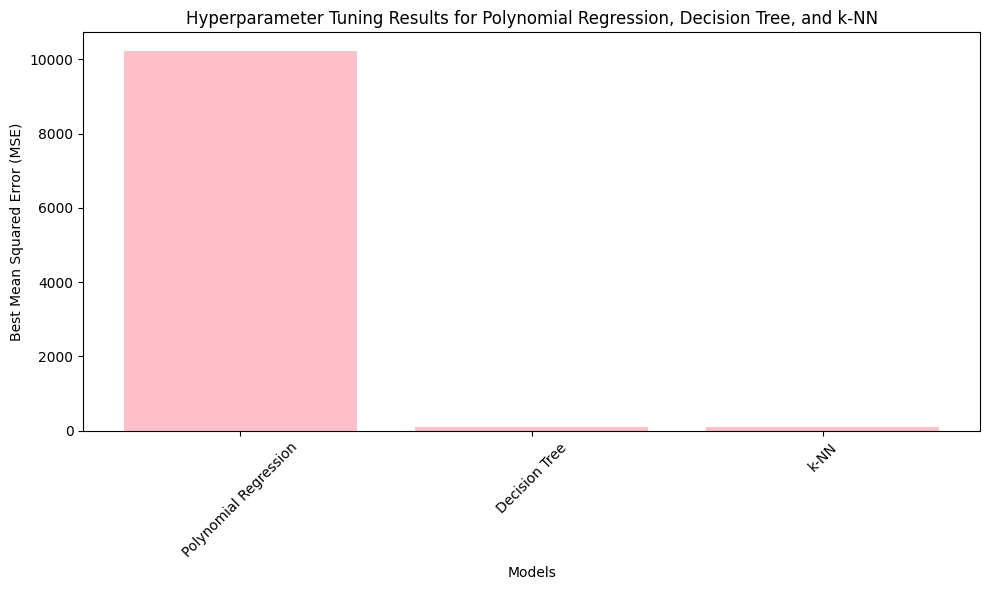

Hyperparameter Tuning Results:
                                                             best_params  \
Polynomial Regression                                {'poly__degree': 1}   
Decision Tree          {'model__max_depth': 5, 'model__min_samples_sp...   
k-NN                                          {'model__n_neighbors': 10}   

                         best_score  
Polynomial Regression  10219.605261  
Decision Tree            101.920302  
k-NN                     106.204197  


In [10]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
#Untuk menangani missing values (nilai yang hilang) dalam dataset.

X = df_imputed.drop(columns=['x1'])
y = df_imputed['x1']
#Membagi dataset menjadi fitur (X) dan target (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Membagi dataset menjadi data training dan data testing.

results = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_
    }
#Melakukan grid search untuk setiap model yang didefinisikan dalam pipelines menggunakan data fitur dan target yang telah disesuaikan, mencari parameter terbaik (hyperparameter tuning), dan menyimpan parameter serta skor terbaik dalam dictionary results.

results_df = pd.DataFrame(results).transpose()
#Mengubah dictionary results (yang berisi hasil grid search untuk setiap model) menjadi DataFrame Pandas dan melakukan transpose pada DataFrame tersebut.

plt.figure(figsize=(10, 6))
models = results_df.index
mse_values = results_df['best_score']

plt.bar(models, mse_values, color='pink')
plt.xlabel("Models")
plt.ylabel("Best Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning Results for Polynomial Regression, Decision Tree, and k-NN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Membuat visualisasi bar chart untuk menampilkan skor Mean Squared Error (MSE) terbaik dari setiap model (Polynomial Regression, Decision Tree, dan k-NN) setelah dilakukan hyperparameter tuning.

print("Hyperparameter Tuning Results:")
print(results_df)
#Menampilkan hasil secara detail

In [12]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("\n")

    return mse, mae, r2
#Mendefinisikan sebuah fungsi bernama evaluate_model yang digunakan untuk mengevaluasi kinerja model machine learning dan menampilkan metrik evaluasinya.

grid_search_results = {}

for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    grid_search_results[model_name] = grid_search
#melakukan hyperparameter tuning pada beberapa model machine learning menggunakan GridSearchCV dan menyimpan hasilnya.

print("Best Polynomial Regression Model:")
evaluate_model(grid_search_results["Polynomial Regression"].best_estimator_, X_test, y_test, "Polynomial Regression")

print("Best Decision Tree Model:")
evaluate_model(grid_search_results["Decision Tree"].best_estimator_, X_test, y_test, "Decision Tree")

print("Best k-Nearest Neighbors Model:")
evaluate_model(grid_search_results["k-NN"].best_estimator_, X_test, y_test, "k-Nearest Neighbors")

print("Best XGBoost Model:")
xgb_model_key = list(pipelines.keys())[-1]
evaluate_model(grid_search_results[xgb_model_key].best_estimator_, X_test, y_test, "XGBoost Regression")
#Evaluasi setiap model dengan parameter terbaik

Best Polynomial Regression Model:
Polynomial Regression Performance:
Mean Squared Error (MSE): 106.82
Mean Absolute Error (MAE): 7.71
R^2 Score: 0.07


Best Decision Tree Model:
Decision Tree Performance:
Mean Squared Error (MSE): 100.70
Mean Absolute Error (MAE): 7.30
R^2 Score: 0.13


Best k-Nearest Neighbors Model:
k-Nearest Neighbors Performance:
Mean Squared Error (MSE): 106.77
Mean Absolute Error (MAE): 7.65
R^2 Score: 0.07


Best XGBoost Model:
XGBoost Regression Performance:
Mean Squared Error (MSE): 106.77
Mean Absolute Error (MAE): 7.65
R^2 Score: 0.07




(106.77440431845443, 7.648052276027527, 0.07411883675541708)

In [13]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2
#Untuk menghitung dan mengembalikan metrik-metrik evaluasi untuk model machine learning, khususnya untuk model regresi.

poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_param_grid = {
    'poly__degree': [2, 3, 4],
    'model__fit_intercept': [True, False]
}
poly_grid = GridSearchCV(poly_pipeline, poly_param_grid, cv=5, scoring='neg_mean_squared_error')
poly_grid.fit(X_train, y_train)
poly_best_model = poly_grid.best_estimator_
poly_y_pred = poly_best_model.predict(X_test)
poly_mse, poly_rmse, poly_mae, poly_r2 = evaluate_model(y_test, poly_y_pred)
print("\nBest Polynomial Regression Model Metrics:")
print(f"MSE: {poly_mse:.2f}, RMSE: {poly_rmse:.2f}, MAE: {poly_mae:.2f}, R^2: {poly_r2:.2f}")
#Polynomial Regression

# Decision Tree
tree_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)
tree_best_model = tree_grid.best_estimator_
tree_y_pred = tree_best_model.predict(X_test)
tree_mse, tree_rmse, tree_mae, tree_r2 = evaluate_model(y_test, tree_y_pred)
print("\nBest Decision Tree Model Metrics:")
print(f"MSE: {tree_mse:.2f}, RMSE: {tree_rmse:.2f}, MAE: {tree_mae:.2f}, R^2: {tree_r2:.2f}")
#Decision Tree

knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)
knn_mse, knn_rmse, knn_mae, knn_r2 = evaluate_model(y_test, knn_y_pred)
print("\nBest k-Nearest Neighbors Model Metrics:")
print(f"MSE: {knn_mse:.2f}, RMSE: {knn_rmse:.2f}, MAE: {knn_mae:.2f}, R^2: {knn_r2:.2f}")
#K-Nearest Neighbors

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, eval_metric='rmse'), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_test, xgb_y_pred)
print("\nBest XGBoost Model Metrics:")
print(f"MSE: {xgb_mse:.2f}, RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}, R^2: {xgb_r2:.2f}")
#XGBoost


Best Polynomial Regression Model Metrics:
MSE: 3993471.75, RMSE: 1998.37, MAE: 1998.34, R^2: -34627.90

Best Decision Tree Model Metrics:
MSE: 100.70, RMSE: 10.04, MAE: 7.30, R^2: 0.13

Best k-Nearest Neighbors Model Metrics:
MSE: 108.44, RMSE: 10.41, MAE: 7.69, R^2: 0.06

Best XGBoost Model Metrics:
MSE: 93.70, RMSE: 9.68, MAE: 7.00, R^2: 0.19
